In [6]:
import numpy as np
import time
import csv

In [7]:
count = 0
data = []
cols = {}
with open("PrivacySheet.csv") as queries:
    csv_reader = csv.reader(queries)
    next(csv_reader)
    count = 0
    for row in csv_reader:
        data.append(row)
        for i in range(19):
            if i in cols.keys():
                cols[i].append(row[i])
            else:
                cols[i] = [row[i]]
        count+=1

In [8]:
import collections
ages = {}
for age, s1, s2, s3 in zip(cols[0], cols[7], cols[11], cols[15]):
    if age in ages.keys():
        ages[age][0].append(s1)
        ages[age][1].append(s2)
        ages[age][2].append(s3)
    else:
        ages[age] = [[s1], [s2], [s3]]

[8, 4, 4, 4, 0]


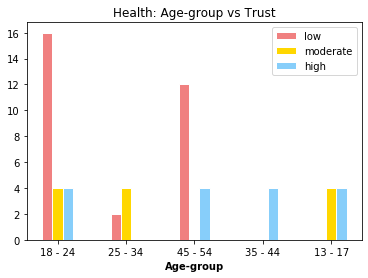

[6, 4, 4, 4, 0]


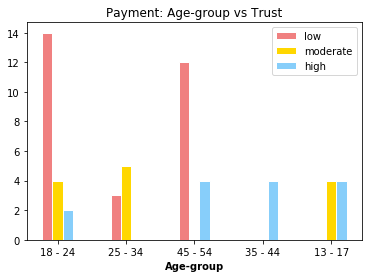

[10, 4, 2, 4, 4]


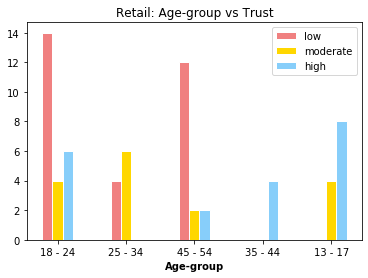

In [9]:
import numpy as np
import matplotlib.pyplot as plt
count = 0 
# set width of bar
for m in range(3):
    simple = []
    for age in ages:
        simple.append(dict(collections.Counter(ages[age][m])))

    barWidth = 0.15
    bars = [[0]*6] * 6

    scale1, scale2, scale3, scale4, scale5 = [0]*5, [0]*5, [0]*5, [0]*5, [0]*5
    for i in range(5):
        for scale, count in simple[i].items():
            if int(scale) == 1 :
                scale1[i] = count
            elif int(scale) == 2:
                scale2[i] = count
            elif int(scale) == 3:
                scale3[i] = count
            elif int(scale) == 4:
                scale4[i] = count
            elif int(scale) == 5:
                scale5[i] = count
    
    
    scale1 = [i+j for i, j in zip(scale1, scale2)]
    scale2 = scale3
    scale3 = [i+j for i, j in zip(scale4, scale5)]
    # set height of bar
    bars1 = scale1
    bars2 = scale2
    bars3 = scale3

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, bars1, color='lightcoral', width=barWidth, edgecolor='white', label='low')
    plt.bar(r2, bars2, color='gold', width=barWidth, edgecolor='white', label='moderate')
    plt.bar(r3, bars3, color='lightskyblue', width=barWidth, edgecolor='white', label='high')

    # Add xticks on the middle of the group bars
    if m == 0:
        plt.title('Health: Age-group vs Trust')
    if m == 1:
        plt.title('Payment: Age-group vs Trust')
    if m == 2:
        plt.title('Retail: Age-group vs Trust')
    plt.xlabel('Age-group', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], ['18 - 24', '25 - 34', '45 - 54', '35 - 44', '13 - 17'])

    # Create legend & Show graphic
    plt.legend()
    plt.show()
